# Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix,
    roc_curve
)


# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Understanding the Data

In [2]:
data=pd.read_csv("/Datsets/loan_approval_dataset.csv")
data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [3]:
data.shape

(4269, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

count          mean           std       min  \
loan_id                    4269.0  2.135000e+03  1.232498e+03       1.0   
 no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
 income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
 loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
 loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
 cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
 residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
 commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
 luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
 bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                 25%         50%         75%         max  
loan_id                       1068.0      2135.0      3202.0      4269.0  
 no_of_dependents                1.0         3.0         4.0         5.0  
 income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
 loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
 loan_term                       6.0        10.0        16.0        20.0  
 cibil_score                   453.0       600.0       748.0       900.0  
 residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
 commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
 luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
 bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

In [8]:
col_name=[]
n_unique=[]
unique_values=[]
col_dtype=[]
for col in data.columns:
    col_name.append(col)
    n_unique.append(data[col].nunique())
    unique_values.append(data[col].unique())
    col_dtype.append(data[col].dtype)
CHECH_DICT={'Column':col_name,'Number of Unique Values':n_unique,'Unique Values':unique_values,'Data Type':col_dtype}
pd.DataFrame(CHECH_DICT)

Column  Number of Unique Values  \
0                     loan_id                     4269   
1            no_of_dependents                        6   
2                   education                        2   
3               self_employed                        2   
4                income_annum                       98   
5                 loan_amount                      378   
6                   loan_term                       10   
7                 cibil_score                      601   
8    residential_assets_value                      278   
9     commercial_assets_value                      188   
10        luxury_assets_value                      379   
11           bank_asset_value                      146   
12                loan_status                        2   

                                        Unique Values Data Type  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     int64  
1                                  [2, 0, 3, 5, 4, 1]     int64  
2                          [ Graduate,  Not Graduate]    object  
3                                         [ No,  Yes]    object  
4   [9600000, 4100000, 9100000, 8200000, 9800000, ...     int64  
5   [29900000, 12200000, 29700000, 30700000, 24200...     int64  
6                [12, 8, 20, 10, 4, 2, 18, 16, 14, 6]     int64  
7   [778, 417, 506, 467, 382, 319, 678, 782, 388, ...     int64  
8   [2400000, 2700000, 7100000, 18200000, 12400000...     int64  
9   [17600000, 2200000, 4500000, 3300000, 8200000,...     int64  
10  [22700000, 8800000, 33300000, 23300000, 294000...     int64  
11  [8000000, 3300000, 12800000, 7900000, 5000000,...     int64  
12                             [ Approved,  Rejected]    object

In [9]:
print(data.columns)
data.columns=data.columns.str.strip()
print(data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [10]:
data['loan_status']=data['loan_status'].apply( lambda x:1 if x==' Approved' else 0)
categorical_cols =data.select_dtypes(include=['object']).columns.str.strip().tolist()
numerical_cols   =data.select_dtypes(exclude=['object']).columns.str.strip().tolist()

In [11]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Data visualization

## Numerical Columns

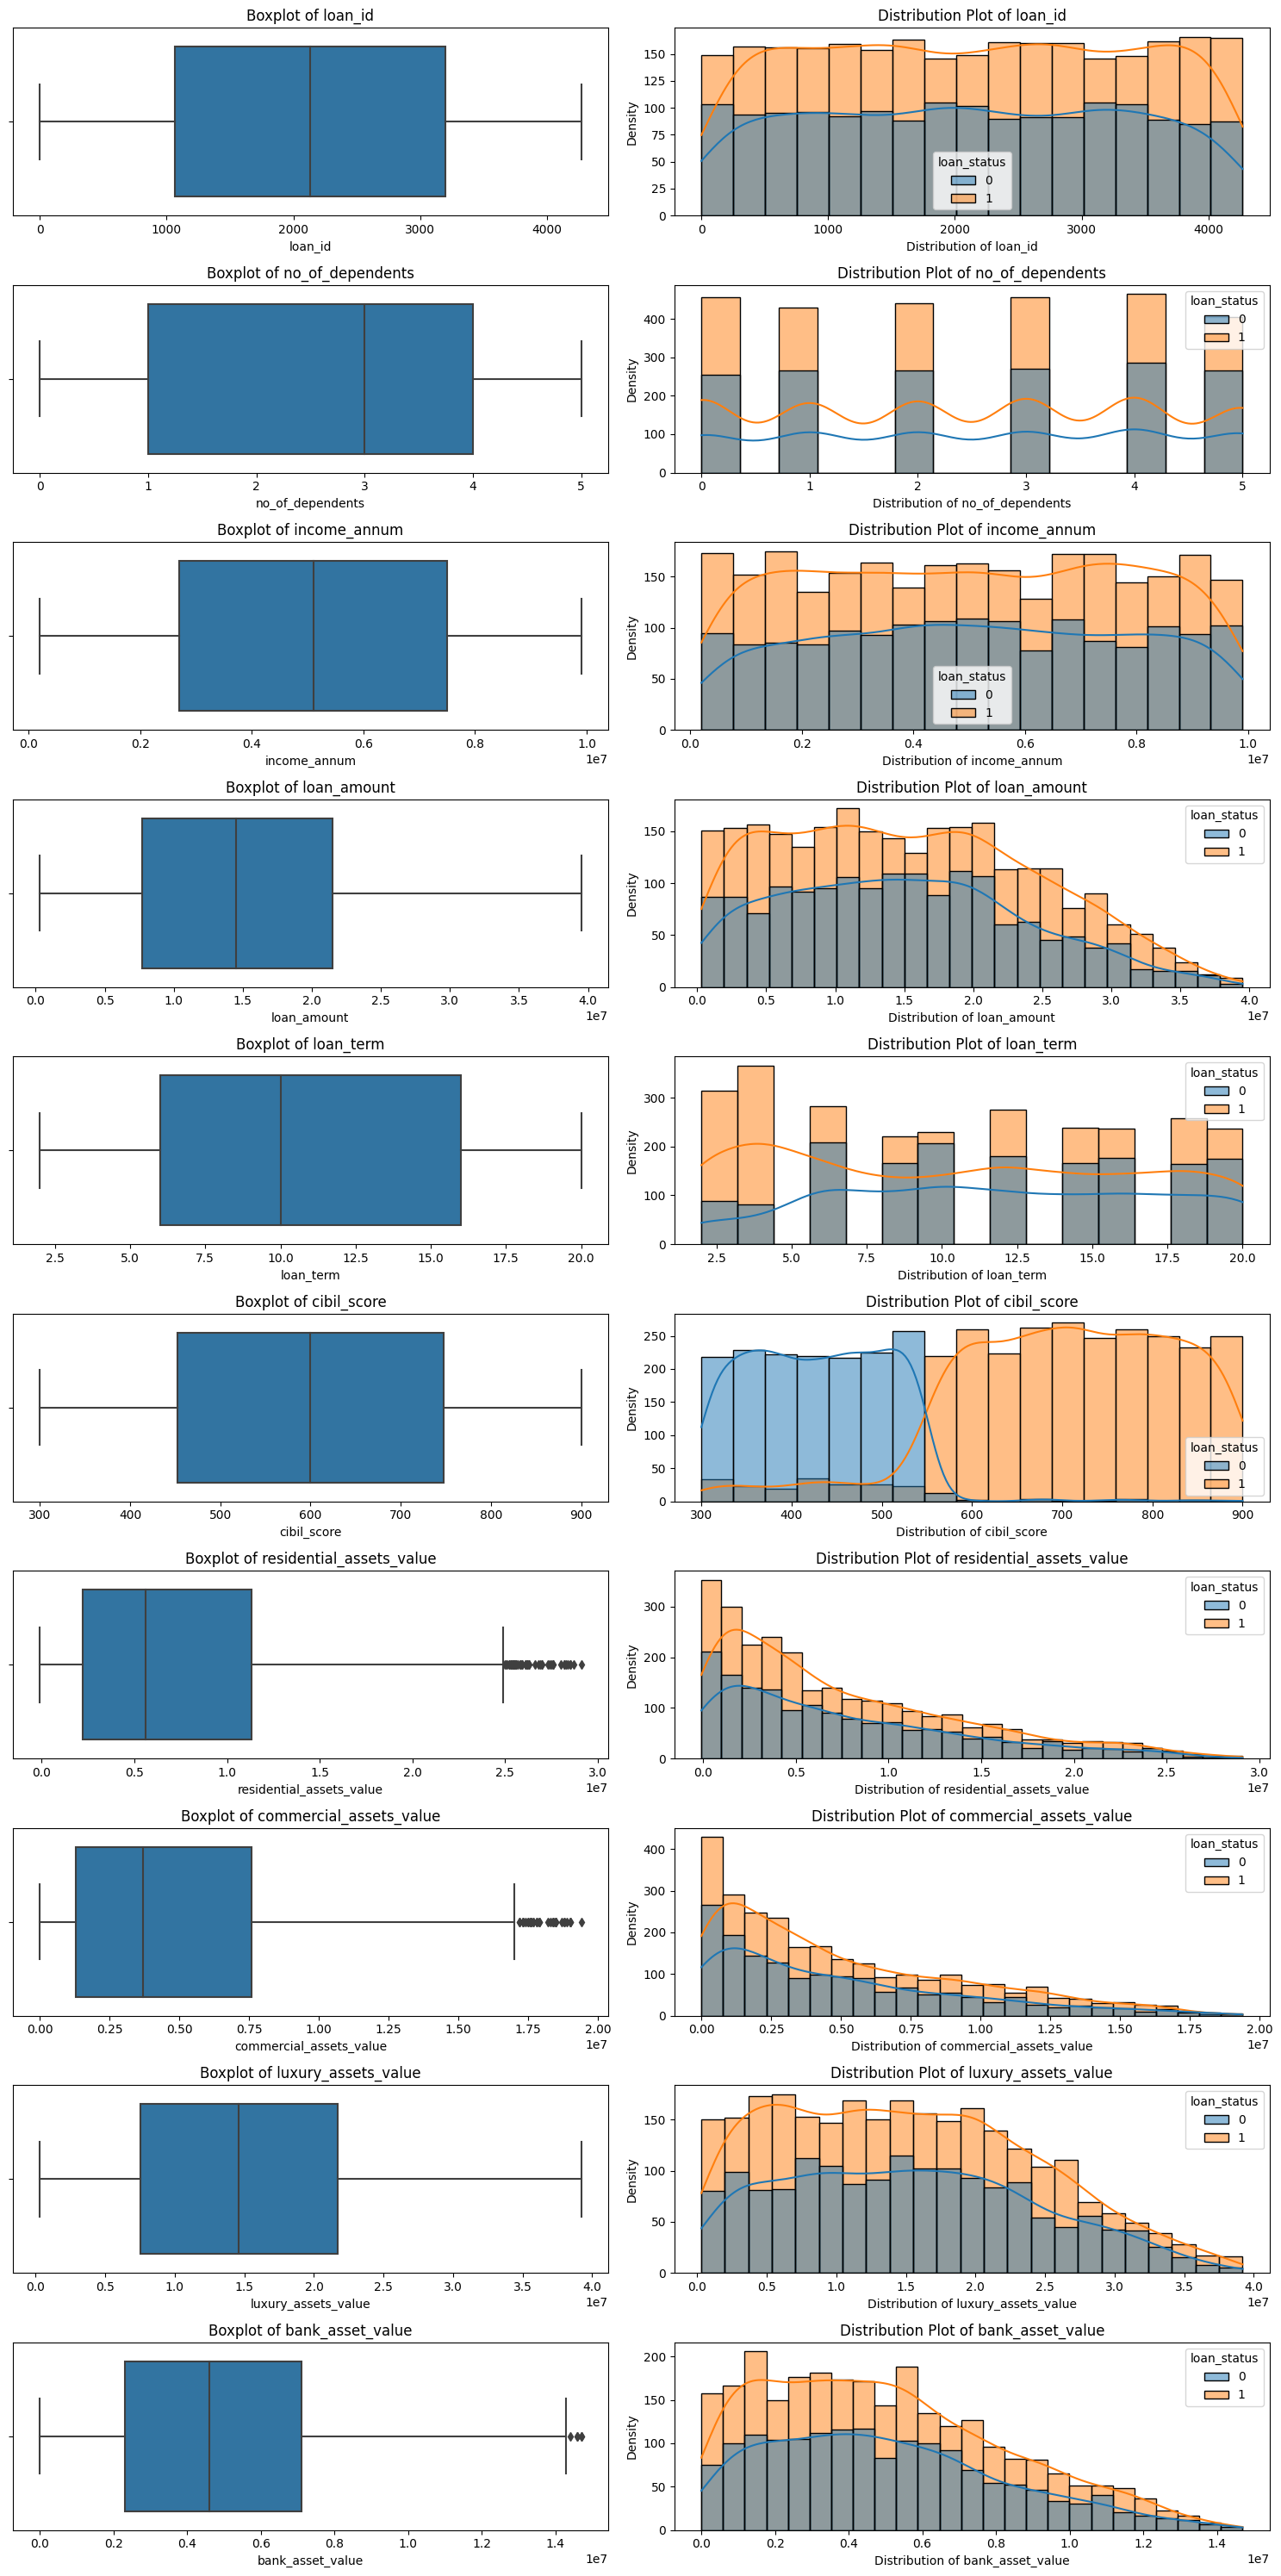

In [12]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols):
    if col=='loan_status':
        continue
    # Boxplot
    plt.subplot(10, 2, 2 * i + 1)
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")

    # Distribution plot
    plt.subplot(10, 2, 2 * i + 2)
    sns.histplot(data,x=col, kde=True, hue=data['loan_status'])
    plt.xlabel(f"Distribution of {col}")
    plt.ylabel("Density")
    plt.title(f"Distribution Plot of {col}")

# Apply tight layout for better spacing
plt.tight_layout()
plt.show()

## Categorical Columns

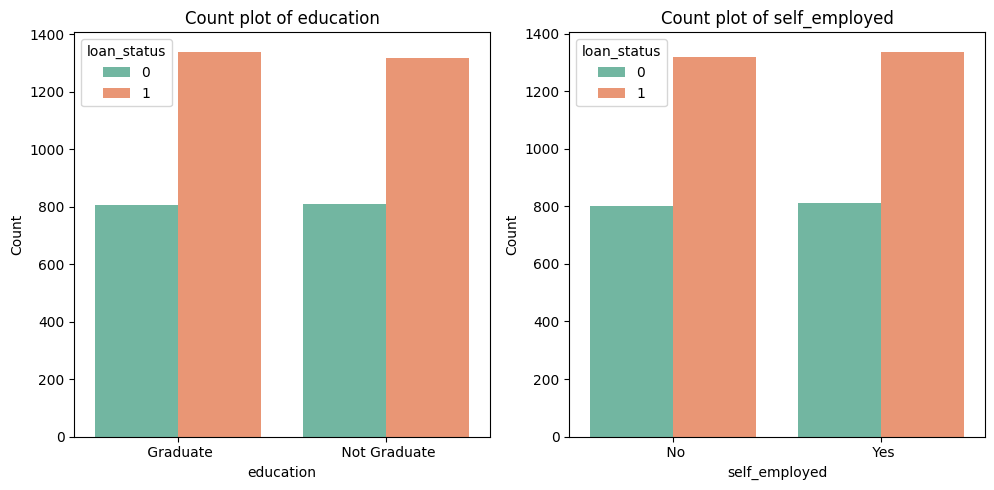

In [13]:
plt.figure(figsize=(15, 5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,3,i+1)
    sns.countplot(x=data[col],palette='Set2',hue=data['loan_status'])
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

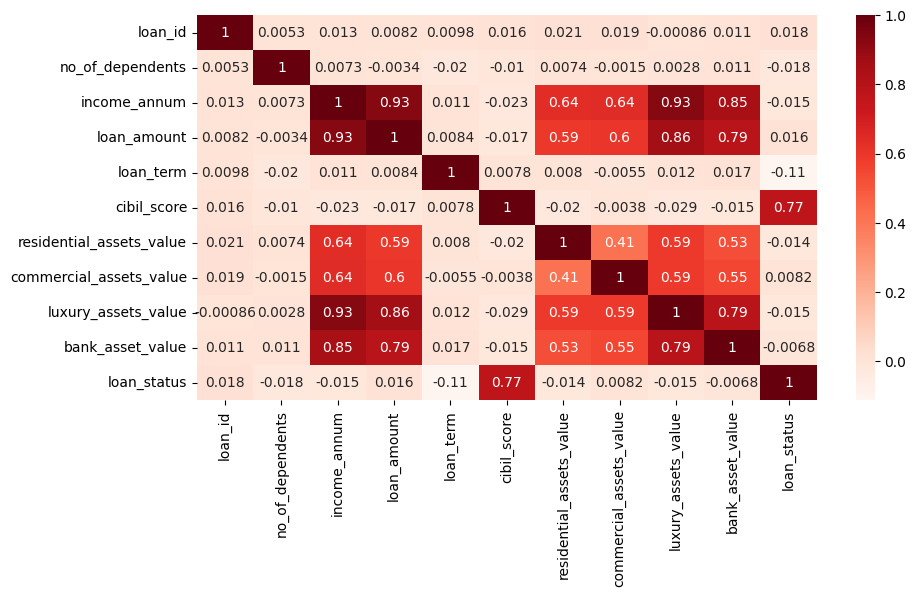

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(data[numerical_cols].corr(),annot=True,cmap='Reds')
plt.show()

In [15]:
cor=data[numerical_cols].corr()
cor['loan_status'].abs().sort_values(ascending=False)

loan_status                 1.000000
cibil_score                 0.770518
loan_term                   0.113036
no_of_dependents            0.018114
loan_id                     0.017685
loan_amount                 0.016150
luxury_assets_value         0.015465
income_annum                0.015189
residential_assets_value    0.014367
commercial_assets_value     0.008246
bank_asset_value            0.006778
Name: loan_status, dtype: float64

In [16]:
loan=data.drop(['loan_id'], axis=1)

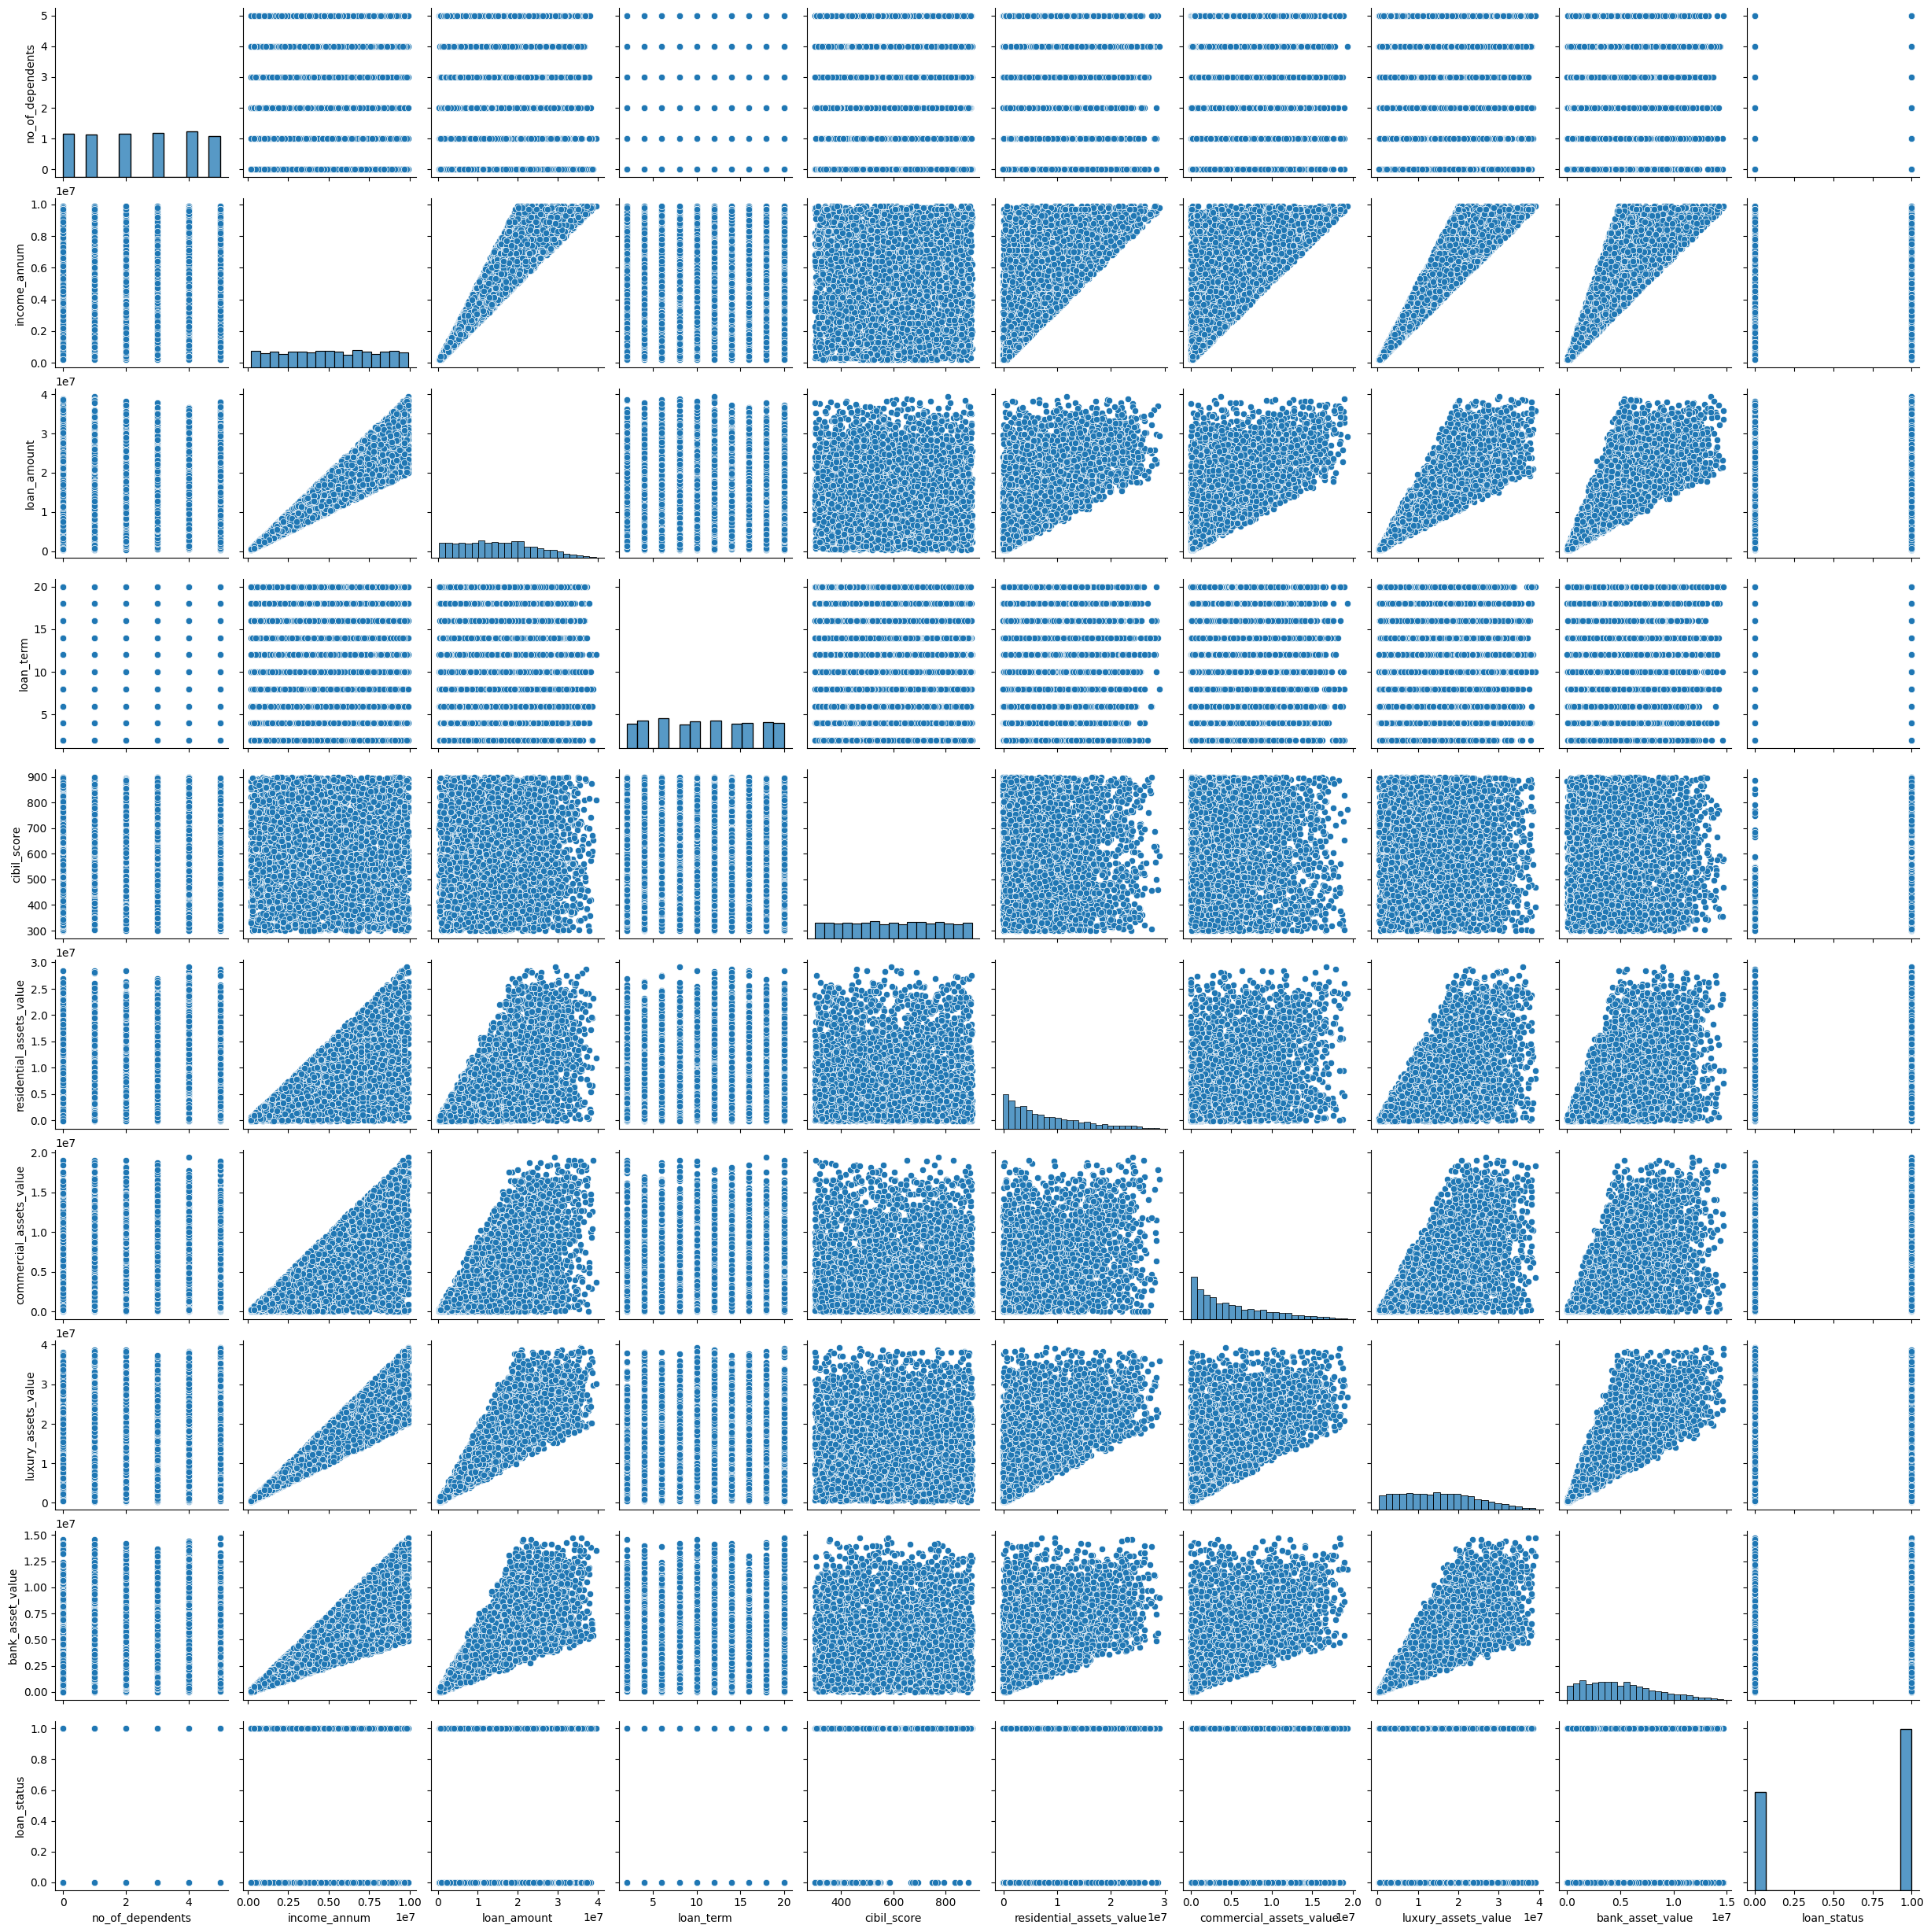

In [17]:
sns.pairplot(loan)
plt.show()

As we can see, there are some variables having positive correlation with other variables

# Data Preprocessing

In [18]:
Q1=loan['residential_assets_value'].quantile(0.25)
Q3=loan['residential_assets_value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier_iqr1=(loan['residential_assets_value']<lower_bound) | (loan['residential_assets_value']>upper_bound)
print(len(data[outlier_iqr1]))

52


In [19]:
Q1=loan['bank_asset_value'].quantile(0.25)
Q3=loan['bank_asset_value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier_iqr2=(loan['bank_asset_value']<lower_bound) | (loan['bank_asset_value']>upper_bound)
print(len(data[outlier_iqr2]))

5


In [20]:
Q1=loan['commercial_assets_value'].quantile(0.25)
Q3=loan['commercial_assets_value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier_iqr3=(loan['commercial_assets_value']<lower_bound) | (loan['commercial_assets_value']>upper_bound)
print(len(data[outlier_iqr3]))

37


In [21]:
# Combine outlier conditions for 3 variables
outliers = loan[(outlier_iqr1) | (outlier_iqr2) | (outlier_iqr3)]
outliers

no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
82                   2   Not Graduate           Yes       9900000   
98                   4       Graduate            No       9400000   
123                  0   Not Graduate           Yes       9000000   
157                  5   Not Graduate           Yes       9900000   
...                ...            ...           ...           ...   
4042                 4       Graduate            No       9300000   
4074                 4   Not Graduate           Yes       9400000   
4120                 3       Graduate            No       9100000   
4205                 2   Not Graduate            No       8900000   
4237                 0   Not Graduate            No       9100000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
82       21200000         16          363                  25500000   
98       29400000         12          562                  25900000   
123      18700000         18          865                  26800000   
157      33300000          6          364                   5300000   
...           ...        ...          ...                       ...   
4042     34900000          6          837                  27400000   
4074     25700000         14          845                  27300000   
4120     19900000          2          711                   2200000   
4205     17800000         20          603                   3300000   
4237     30100000          8          322                  26200000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
82                   11400000             26600000           6800000   
98                   15200000             36400000           7100000   
123                         0             20900000          11300000   
157                  18700000             27800000           8300000   
...                       ...                  ...               ...   
4042                   800000             21400000           8500000   
4074                  4100000             26500000          12200000   
4120                 17900000             24300000          13000000   
4205                 17600000             29000000          13100000   
4237                  9500000             18800000           5900000   

      loan_status  
0               1  
82              0  
98              1  
123             1  
157             0  
...           ...  
4042            1  
4074            1  
4120            1  
4205            1  
4237            0  

[91 rows x 12 columns]

In [22]:
loan=loan[~((outlier_iqr1) | (outlier_iqr2) | (outlier_iqr3))]

In [23]:
loan_dummies=pd.get_dummies(loan,dtype=int)
loan_dummies.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes'],
      dtype='object')

In [24]:
loan_dummies.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed'}, inplace = True)
loan_dummies.drop(['education_ Not Graduate', 'self_employed_ No'], axis=1,inplace=True)

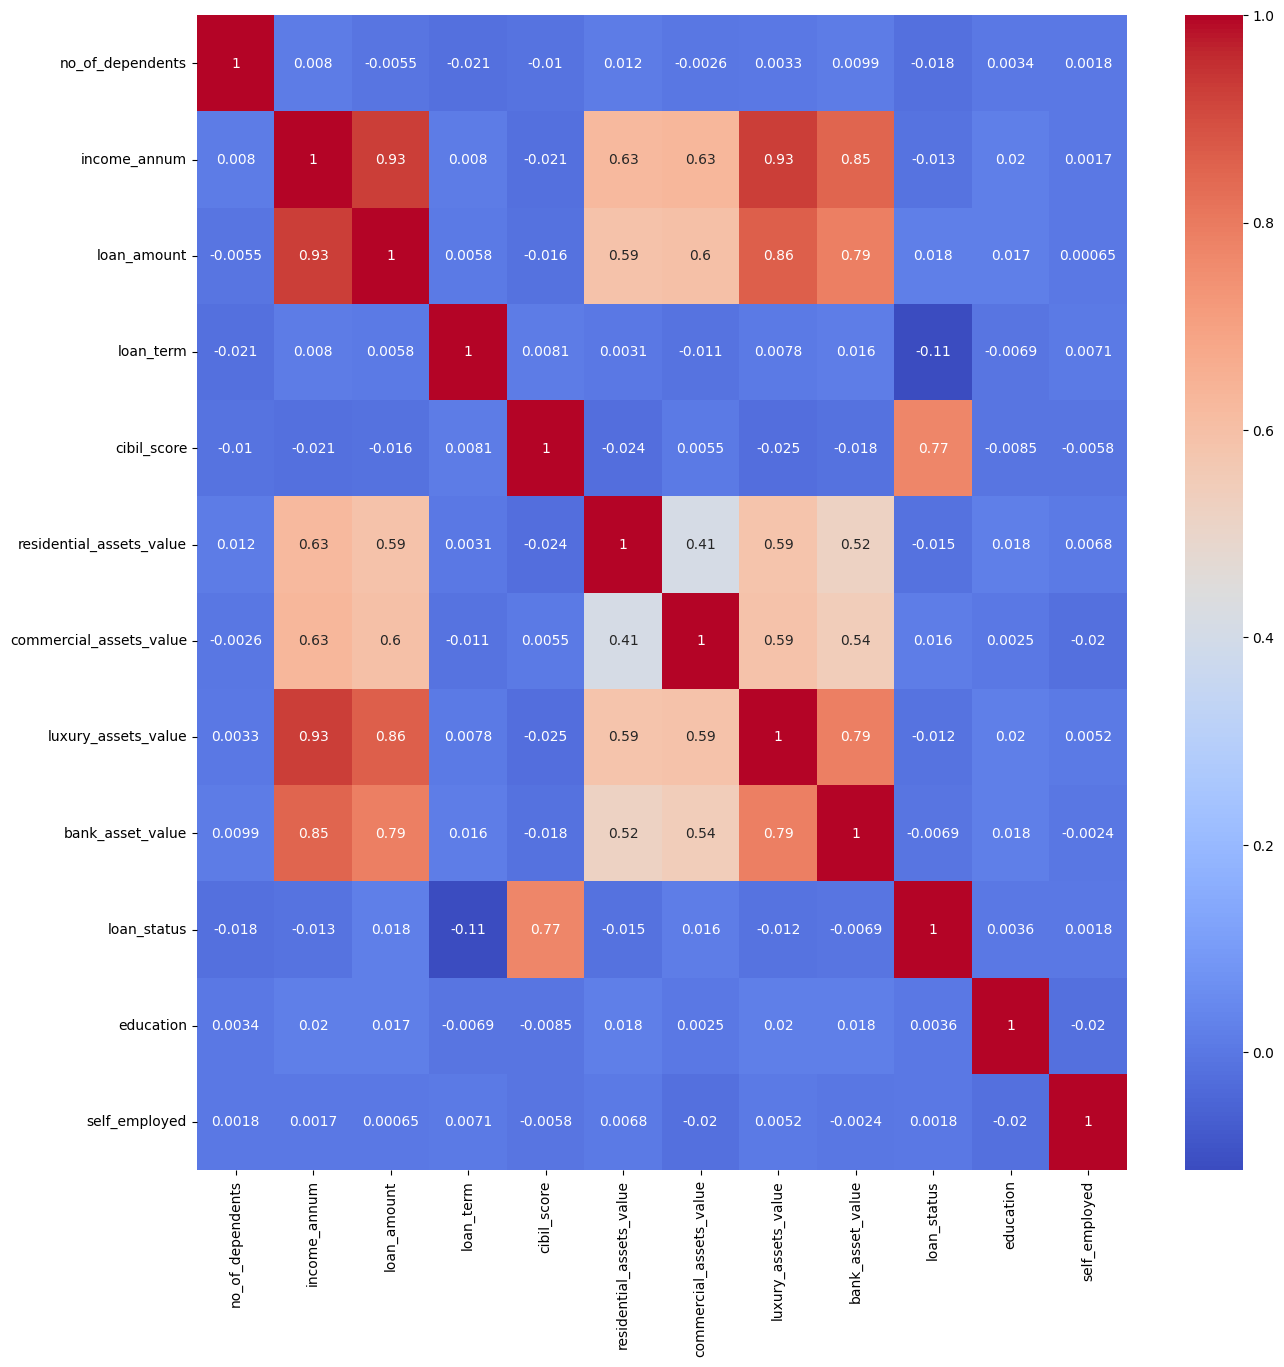

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(loan_dummies.corr(),annot=True,cmap='coolwarm')
plt.show()

In [26]:
cor=loan_dummies.corr()
cor['loan_status'].abs().sort_values(ascending=False)

loan_status                 1.000000
cibil_score                 0.770568
loan_term                   0.113817
no_of_dependents            0.018433
loan_amount                 0.017932
commercial_assets_value     0.015995
residential_assets_value    0.015449
income_annum                0.012652
luxury_assets_value         0.011700
bank_asset_value            0.006877
education                   0.003618
self_employed               0.001756
Name: loan_status, dtype: float64

In [27]:
y = loan_dummies['loan_status']
X = loan_dummies.drop(['loan_status'], axis =1)

In [28]:
numerical_cols.remove('loan_id')
numerical_cols.remove('loan_status')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3342, 11), (3342,), (836, 11), (836,))

In [31]:
X_train.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education',
       'self_employed'],
      dtype='object')

In [32]:
numerical_cols

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [33]:
scaler=StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [34]:
X_train

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
833           1.483118     -0.538572    -0.608849  -1.205740     0.362635   
3067         -0.873231     -1.010799    -1.114251  -1.555257     0.888249   
3346          0.894031      1.604609     2.064169   1.240880    -1.341277   
793          -0.284144      0.333230     0.660273   0.541846    -0.411345   
3556          1.483118      0.078954     0.649042  -1.555257    -0.365138   
...                ...           ...          ...        ...          ...   
3516         -0.873231      0.696481     0.828740   0.891363     0.414619   
478           0.304944     -0.502247    -0.709929  -0.506706     1.090408   
3160         -0.873231     -1.228750    -1.069327  -1.205740    -1.630076   
3850          1.483118     -0.901824    -0.620080   0.891363     0.772729   
877          -0.873231      0.078954    -0.417919  -0.856223     0.559018   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
833                   0.374621                -1.033293            -0.793726   
3067                 -0.992884                -0.556135            -0.916827   
3346                  2.181680                 0.183460             1.936885   
793                  -0.016095                 0.231176            -0.200601   
3556                 -0.651007                -0.675425            -0.032736   
...                        ...                      ...                  ...   
3516                  1.660726                -1.128725             0.717063   
478                  -0.292852                 0.255034            -0.569905   
3160                 -0.488209                -0.627709            -1.196603   
3850                 -1.171962                -0.627709            -0.603478   
877                   1.123492                 0.660619             0.437287   

      bank_asset_value  education  self_employed  
833           0.096177          0              1  
3067         -0.532276          0              0  
3346          0.724629          1              0  
793           1.227392          0              0  
3556         -0.406586          1              0  
...                ...        ...            ...  
3516          1.290237          1              1  
478           0.096177          0              1  
3160         -1.035039          1              0  
3850         -1.003616          0              1  
877          -0.689389          1              0  

[3342 rows x 11 columns]

In [35]:
pca = PCA(n_components=.95)
X_train_ = pca.fit_transform(X_train)
X_test_=pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.46986009, 0.10713071, 0.10534495, 0.10363155, 0.06189911,
       0.05541237, 0.02684178, 0.0257893 ])

# Models 

In [36]:
# Initialize result dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC Score": [],
    "Cross-Validation Score":[]
}

# Function to append results
def append_results(model_name, accuracy, precision, recall, f1_score, roc_auc_score,cross_score):
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1_score)
    results['ROC-AUC Score'].append(roc_auc_score)
    results['Cross-Validation Score'].append(cross_score)


In [37]:
def model_evaluation_classification(y_pred, y_test, model, X_train, y_train, y_pred_proba=None):
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC Score
    if y_pred_proba is not None:
        roc_auc =  roc_auc_score(y_test, y_pred_proba[:, 1])
    else :
        roc_auc = "N/A (no probabilities provided)"

    # Cross-validation score on the training set
    cross_score = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Cross-Validation Score: {cross_score.mean():.4f}")
    
    # Display predictions and actual values
    display(pd.DataFrame(np.c_[y_pred, y_test], columns=["Prediction", "Actual"]))
    
    # Return metrics
    return accuracy, precision, recall, f1, roc_auc, cross_score.mean()

## Logistic Regression 

In [38]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg=lg.predict(X_test)
y_pred_proba_lg=lg.predict_proba(X_test)
accuracy_lg, precision_lg, recall_lg, f1_lg, roc_auc_lg, cross_score_lg = model_evaluation_classification(y_pred_lg, y_test, lg, X_train, y_train, y_pred_proba_lg)
append_results("Logistic Regression",accuracy_lg, precision_lg, recall_lg, f1_lg, roc_auc_lg, cross_score_lg)

Accuracy: 0.9127
Precision: 0.9291
Recall: 0.9309
F1-Score: 0.9300
ROC-AUC Score: 0.9677
Cross-Validation Score: 0.9189


Prediction  Actual
0             1       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

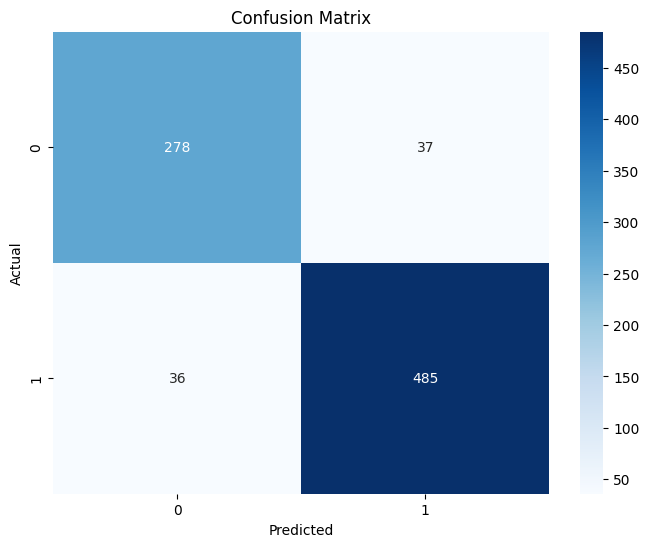

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred_lg)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbour (KNN)

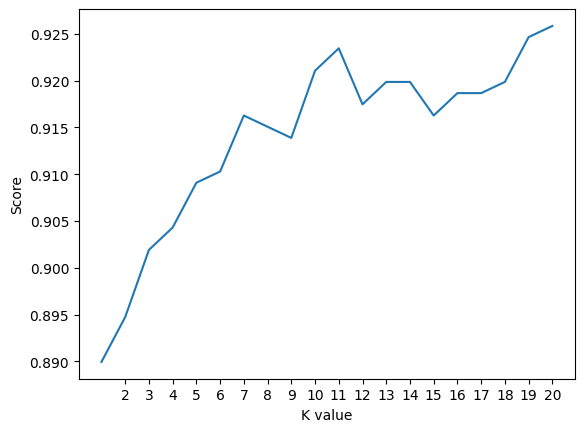

KNN best accuracy: 92.58% with n=20


In [40]:
knn_scores=[]
knn_test=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

plt.plot(range(1,21),knn_scores)
plt.xlabel("K value")
plt.xticks(np.arange(2,21,1))
plt.ylabel("Score")
plt.show()
KNAcc_i = np.argmax(knn_scores)+1
KNAcc   = max(knn_scores)
print("KNN best accuracy: {:.2f}% with n={}".format(KNAcc*100, KNAcc_i))

In [41]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_proba_knn=knn.predict_proba(X_test)
# Evaluate the KNN model
accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn, cross_score_knn = model_evaluation_classification(y_pred_knn, y_test, knn, X_train, y_train, y_pred_proba_knn)
# Append results for KNN
append_results("KNN",accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn, cross_score_knn)

Accuracy: 0.9187
Precision: 0.9521
Recall: 0.9155
F1-Score: 0.9335
ROC-AUC Score: 0.9719
Cross-Validation Score: 0.9198


Prediction  Actual
0             0       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

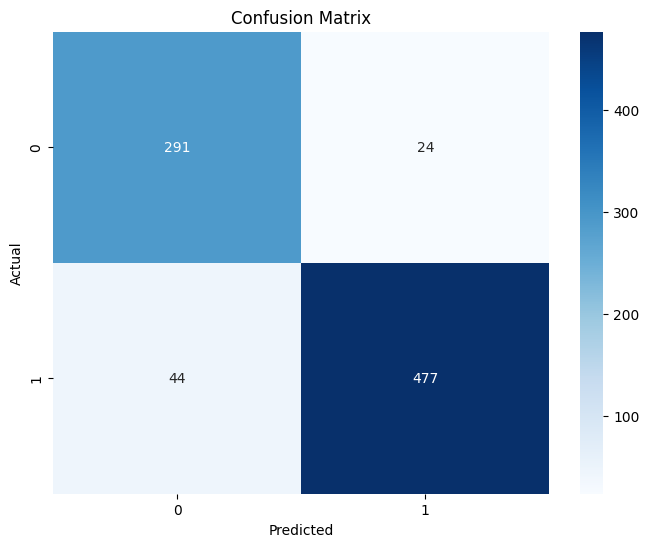

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM)

In [43]:
svc = SVC( probability=True,random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_proba_svc = svc.predict_proba(X_test)

In [44]:
# Evaluate the SVC model
accuracy_svc, precision_svc, recall_svc, f1_svc, roc_auc_svc, cross_score_svc = model_evaluation_classification(
    y_pred_svc, y_test, svc, X_train, y_train, y_pred_proba_svc)

# Append results for SVC
append_results("SVC", accuracy_svc, precision_svc, recall_svc, f1_svc, roc_auc_svc, cross_score_svc)

Accuracy: 0.9414
Precision: 0.9591
Recall: 0.9463
F1-Score: 0.9527
ROC-AUC Score: 0.9830
Cross-Validation Score: 0.9399


Prediction  Actual
0             0       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

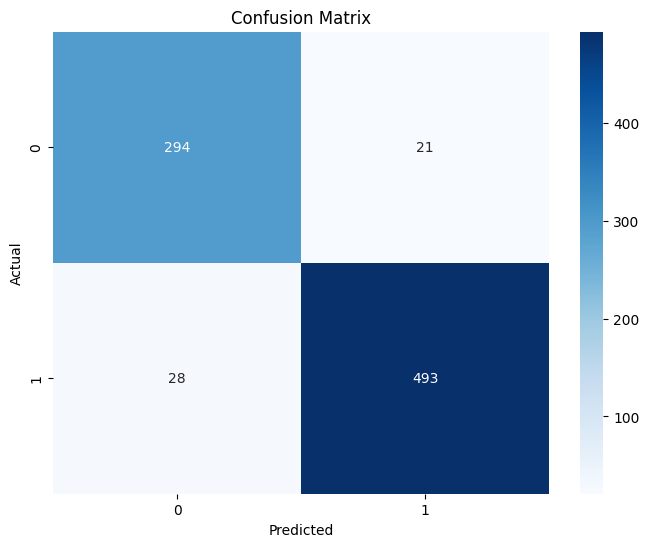

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)

In [47]:
# Evaluate the best model
accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt, cross_score_dt = model_evaluation_classification(
    y_pred_dt, y_test, dt, X_train, y_train, y_pred_proba_dt)

# Append results for Decision Tree
append_results("Decision Tree", accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt, cross_score_dt)

Accuracy: 0.9737
Precision: 0.9864
Recall: 0.9712
F1-Score: 0.9787
ROC-AUC Score: 0.9745
Cross-Validation Score: 0.9752


Prediction  Actual
0             0       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

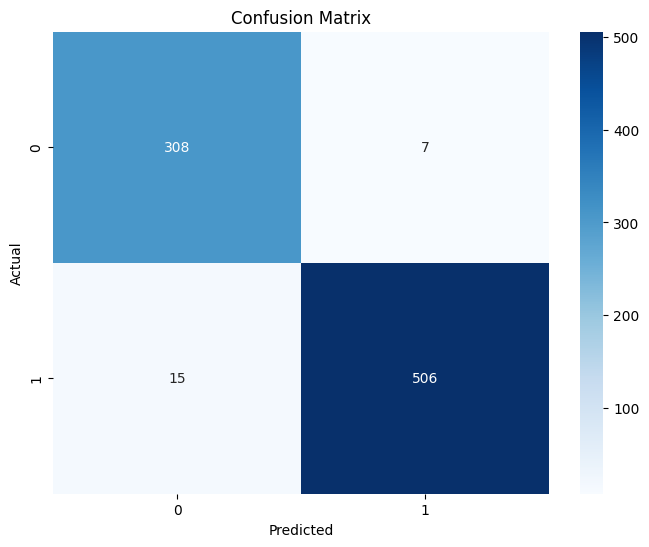

In [48]:
conf_matrix=confusion_matrix(y_test,y_pred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

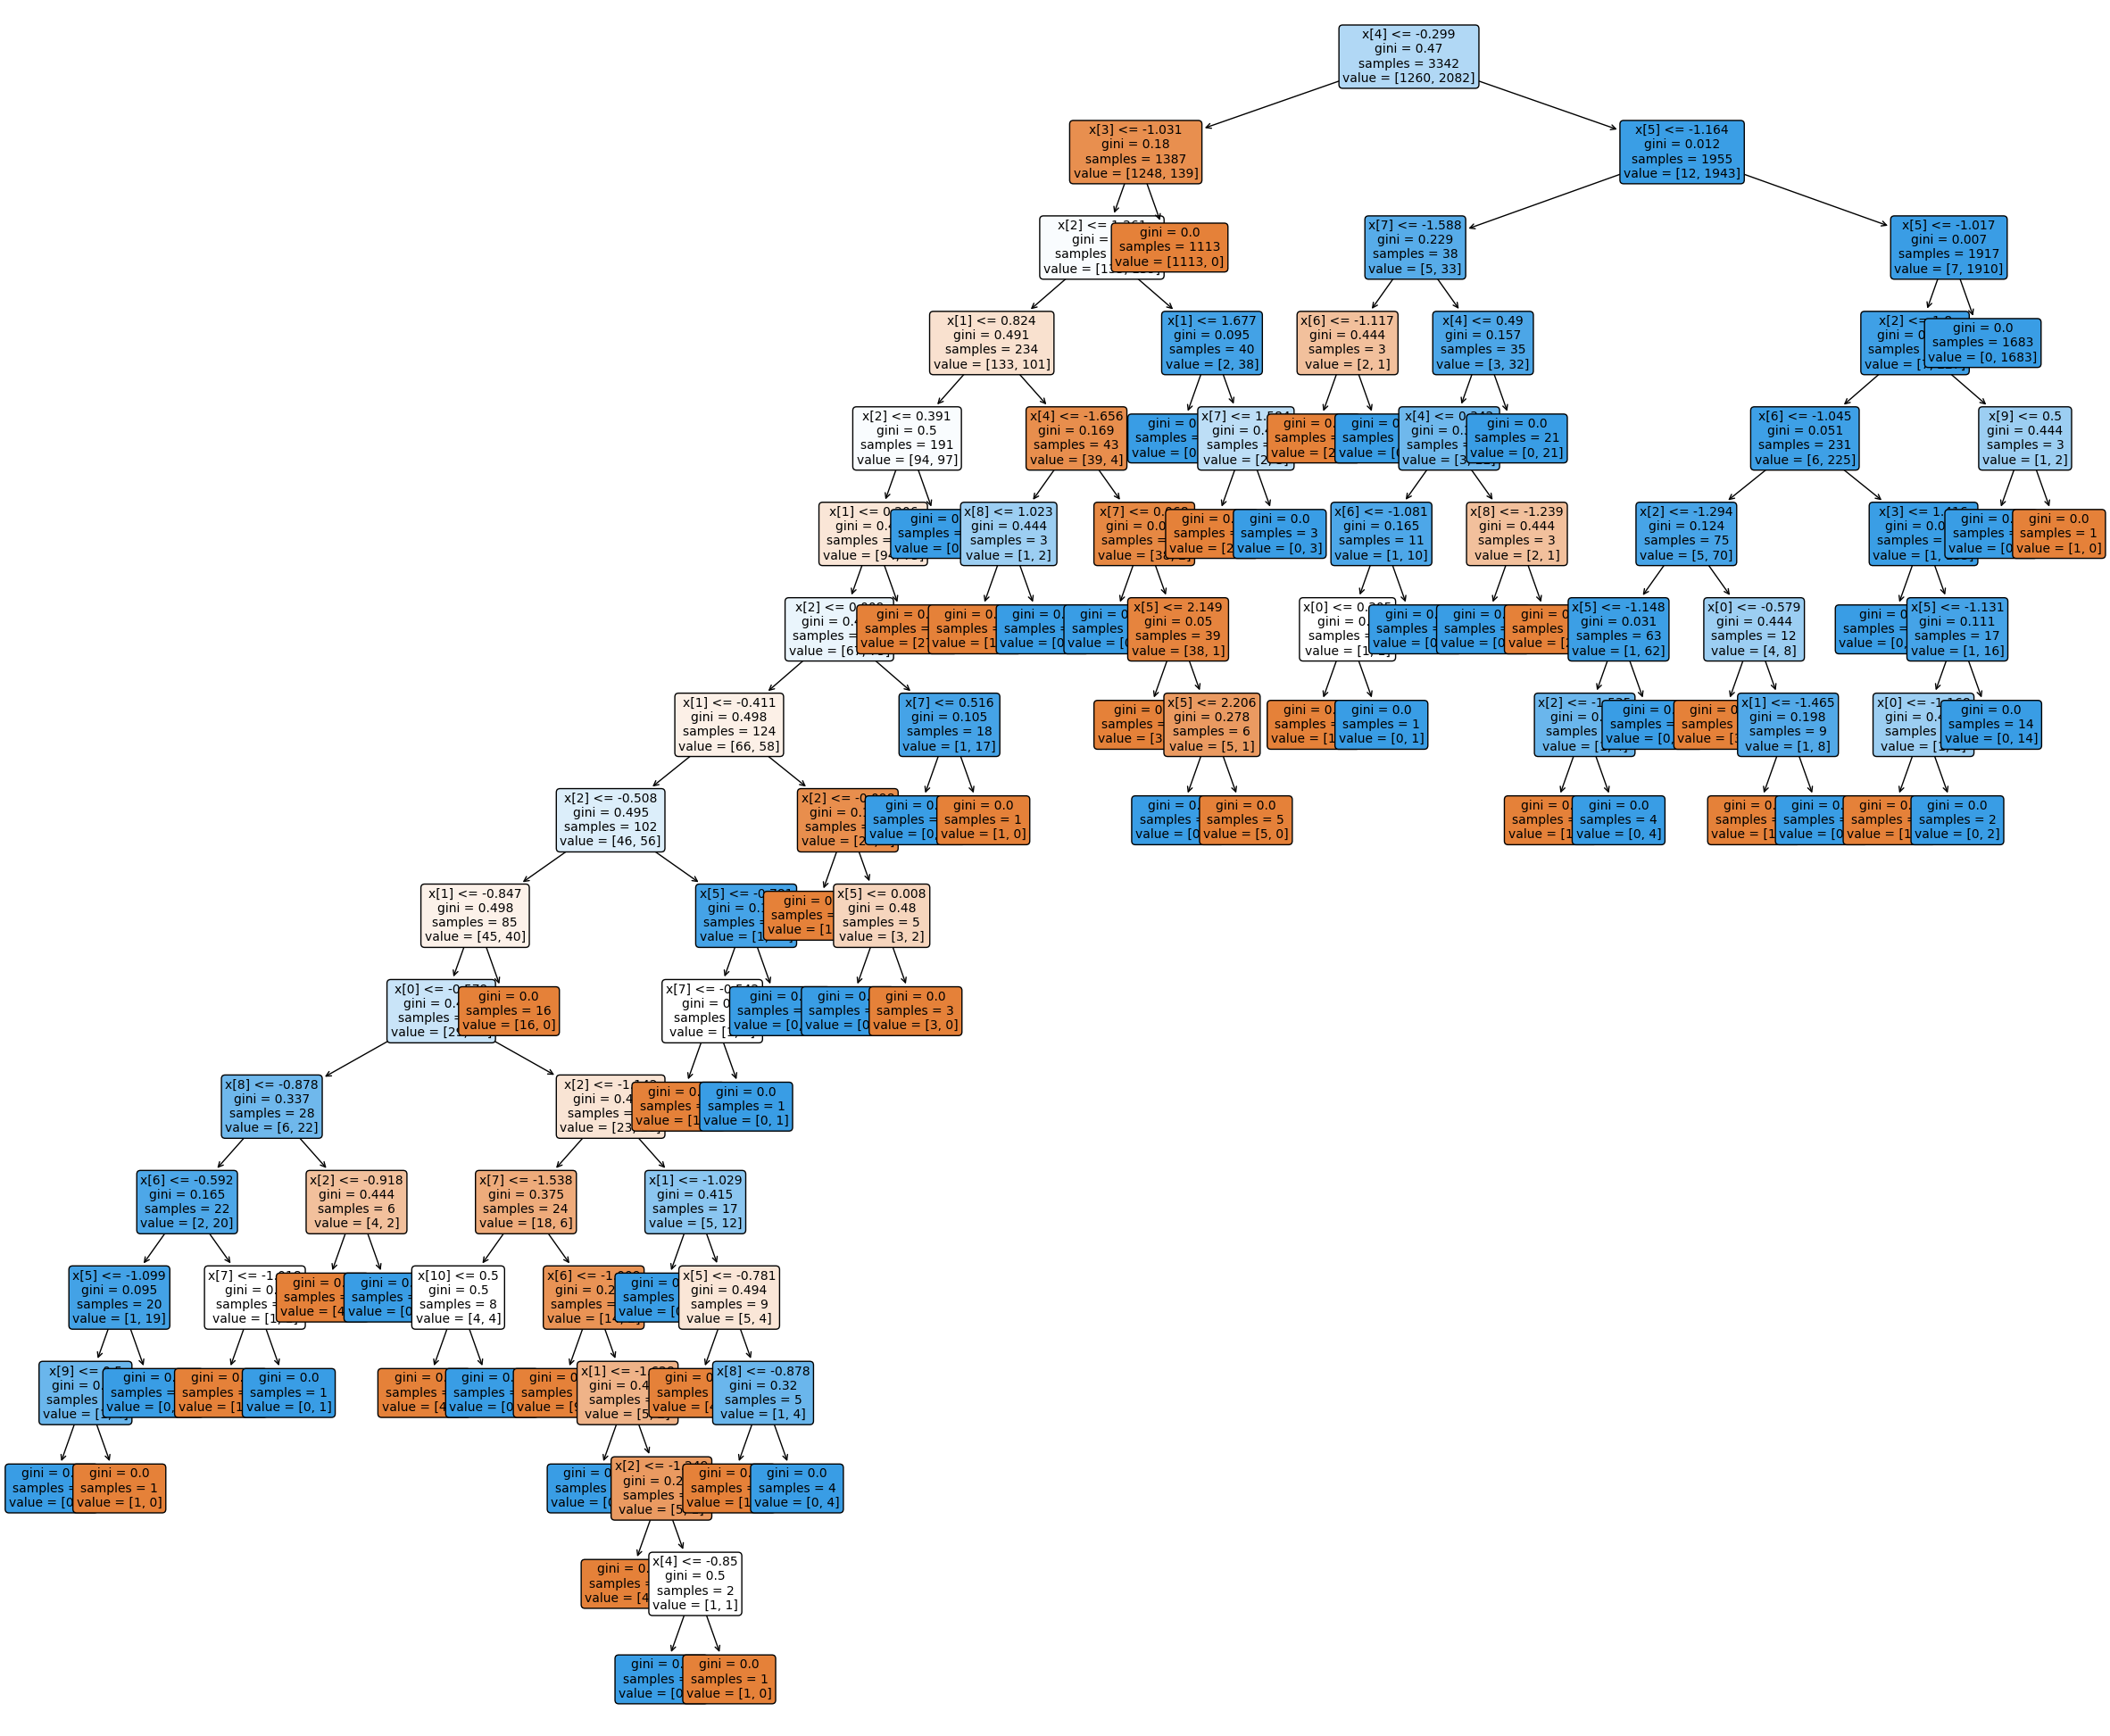

In [49]:
from sklearn import tree
plt.figure(figsize=(30,25))
tree.plot_tree(dt,filled=True,rounded=True,fontsize=10)        
plt.show()

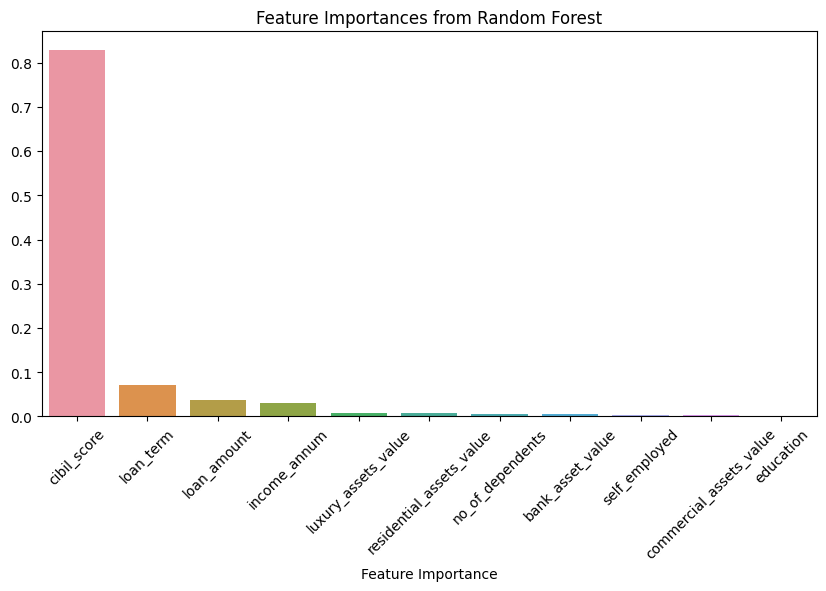

In [50]:
dt_importances=dt.feature_importances_
dt_importances_series = pd.Series(dt_importances,index=X_train.columns)
forest_importances_sorted=dt_importances_series.sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=forest_importances_sorted.index,y=forest_importances_sorted.values)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45)  # 
plt.show()

## Random Forest 

In [51]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

In [52]:
# Evaluate the RF model
accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf, cross_score_rf = model_evaluation_classification(
    y_pred_rf, y_test, rf, X_train, y_train, y_pred_proba_rf)

# Append results for RF
append_results("Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf, cross_score_rf)

Accuracy: 0.9785
Precision: 0.9903
Recall: 0.9750
F1-Score: 0.9826
ROC-AUC Score: 0.9987
Cross-Validation Score: 0.9770


Prediction  Actual
0             1       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

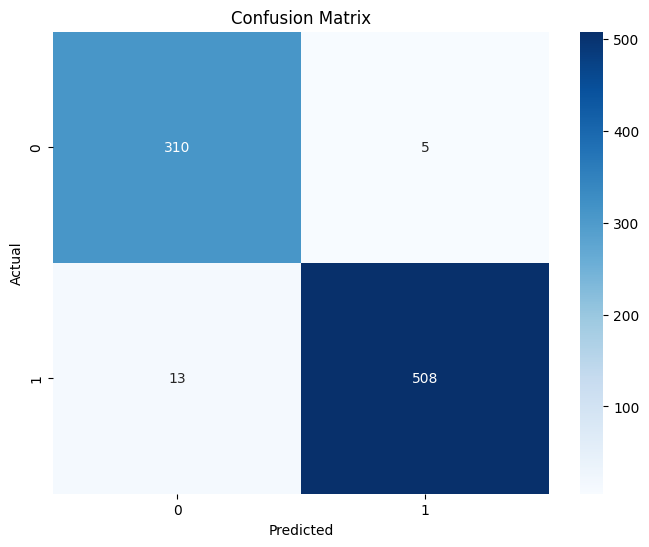

In [53]:
conf_matrix=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

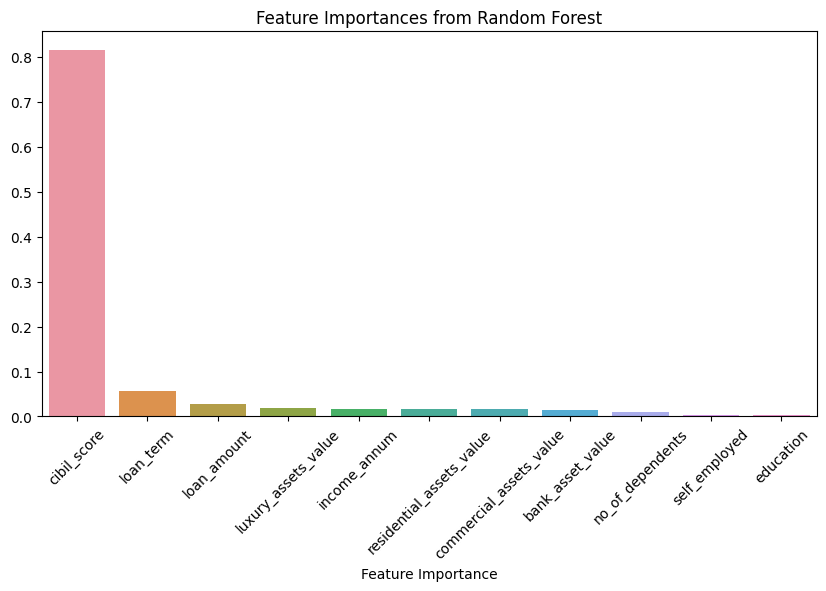

In [54]:
rf_importances=rf.feature_importances_ 
forest_importances = pd.Series(rf_importances,index=X_train.columns)
forest_importances_sorted=forest_importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=forest_importances_sorted.index,y=forest_importances_sorted.values)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45)  # 
plt.show()

## Ensemble Learning  

In [55]:
voting_clf= VotingClassifier(
    estimators=[
        ('lg', lg), 
        ('knn', knn), 
        ('svc', svc),
        ('dt', dt), 
        ('rf', rf)
    ],
    voting='soft'   
)
voting_clf.fit(X_train,y_train)
y_pred_voting = voting_clf.predict(X_test)
y_pred_voting_proba = voting_clf.predict_proba(X_test)

In [56]:
# Evaluate the Voting Classifier
accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting, cross_score_voting = model_evaluation_classification(
    y_pred_voting, y_test, voting_clf, X_train, y_train, y_pred_voting_proba)

# Append results for Voting Classifier
append_results("Soft-Voting Classifier", accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting, cross_score_voting)

Accuracy: 0.9713
Precision: 0.9882
Recall: 0.9655
F1-Score: 0.9767
ROC-AUC Score: 0.9954
Cross-Validation Score: 0.9734


Prediction  Actual
0             0       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

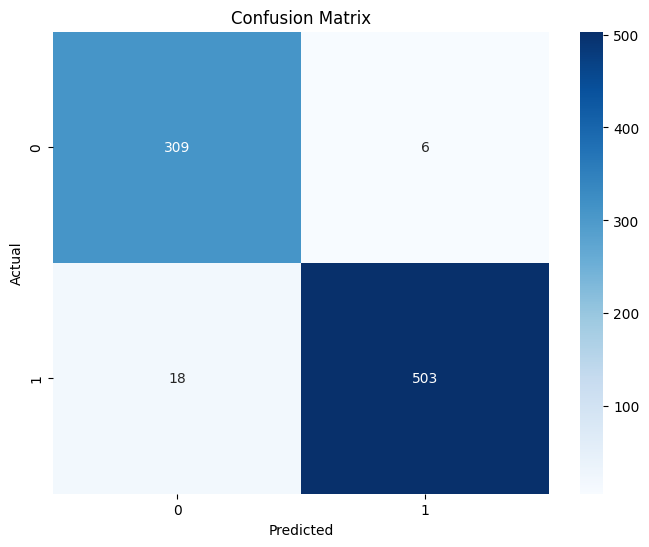

In [57]:
conf_matrix=confusion_matrix(y_test,y_pred_voting)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
voting_clf= VotingClassifier(
    estimators=[
        ('lg', lg), 
        ('knn', knn), 
        ('svc', svc),
        ('dt', dt), 
        ('rf', rf)
    ],
    voting='hard'   
)
voting_clf.fit(X_train,y_train)
y_pred_voting = voting_clf.predict(X_test)


In [59]:
# Evaluate the Voting Classifier
accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting, cross_score_voting = model_evaluation_classification(
    y_pred_voting, y_test, voting_clf, X_train, y_train, y_pred_voting_proba)

# Append results for Voting Classifier
append_results("Hard-Voting Classifier", accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting, cross_score_voting)

Accuracy: 0.9510
Precision: 0.9743
Recall: 0.9463
F1-Score: 0.9601
ROC-AUC Score: 0.9954
Cross-Validation Score: 0.9593


Prediction  Actual
0             0       1
1             0       0
2             0       0
3             1       1
4             1       1
..          ...     ...
831           1       1
832           0       0
833           0       0
834           0       0
835           1       1

[836 rows x 2 columns]

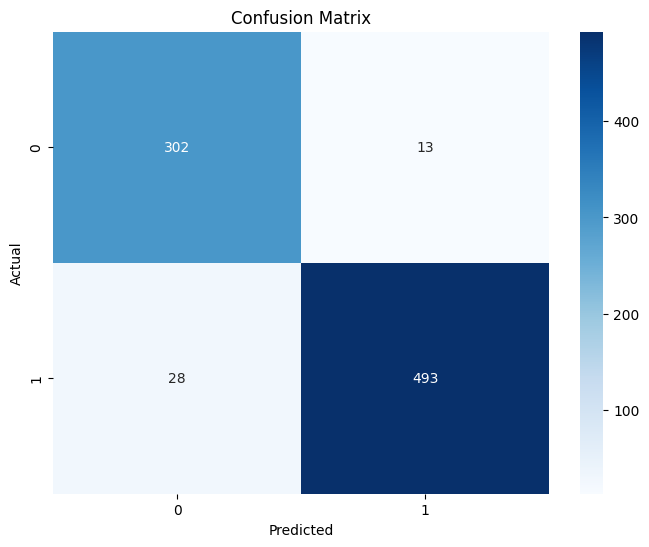

In [60]:
conf_matrix=confusion_matrix(y_test,y_pred_voting)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Comparison

In [61]:
Models=pd.DataFrame(results)
Models.sort_values(by='Accuracy',ascending=False)

Model  Accuracy  Precision    Recall  F1-Score  \
4           Random Forest  0.978469   0.990253  0.975048  0.982592   
3           Decision Tree  0.973684   0.986355  0.971209  0.978723   
5  Soft-Voting Classifier  0.971292   0.988212  0.965451  0.976699   
6  Hard-Voting Classifier  0.950957   0.974308  0.946257  0.960078   
2                     SVC  0.941388   0.959144  0.946257  0.952657   
1                     KNN  0.918660   0.952096  0.915547  0.933464   
0     Logistic Regression  0.912679   0.929119  0.930902  0.930010   

   ROC-AUC Score  Cross-Validation Score  
4       0.998708                0.976958  
3       0.974493                0.975161  
5       0.995400                0.973367  
6       0.995400                0.959303  
2       0.983036                0.939853  
1       0.971892                0.919805  
0       0.967712                0.918907

## ROC-AUC curve

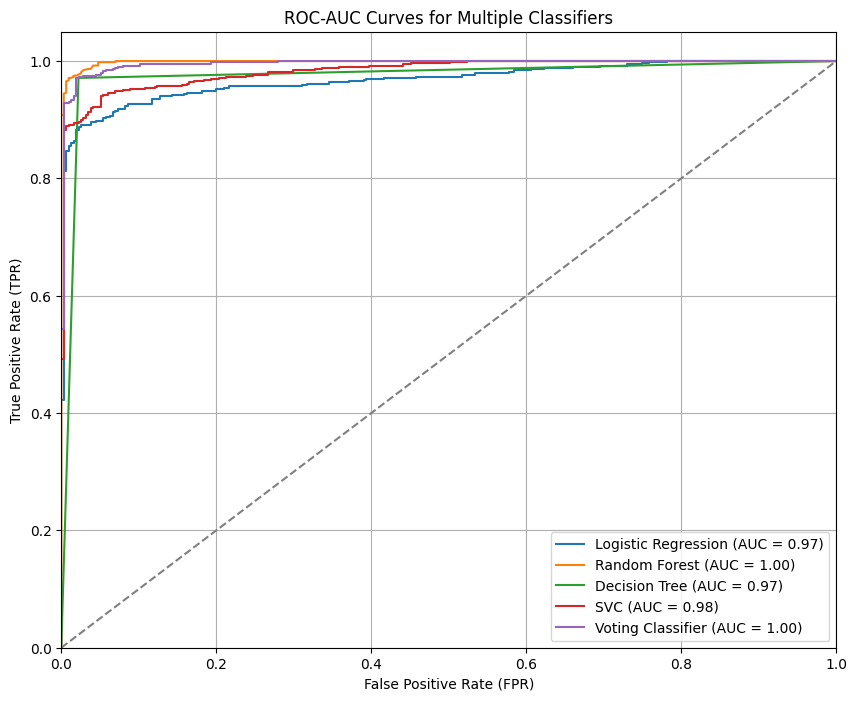

In [62]:
# Plot ROC-AUC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lg[:,1])
auc_score = roc_auc_score(y_test, y_pred_proba_lg[:,1])
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf[:,1])
auc_score = roc_auc_score(y_test, y_pred_proba_rf[:,1])
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt[:,1])
auc_score = roc_auc_score(y_test, y_pred_proba_dt[:,1])
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')

# Support Vector Classifier
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svc[:,1])
auc_score = roc_auc_score(y_test, y_pred_proba_svc[:,1])
plt.plot(fpr, tpr, label=f'SVC (AUC = {auc_score:.2f})')

# Voting Classifier
fpr, tpr, _ = roc_curve(y_test, y_pred_voting_proba[:,1])
auc_score = roc_auc_score(y_test, y_pred_voting_proba[:,1])
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curves for Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importances

### Decision Tree

In [63]:
dt_importances = pd.DataFrame({'Features':X.columns,"Importance":dt.feature_importances_})
dt_importances_sorted = dt_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
dt_importances_sorted

Features  Importance
0                cibil_score    0.828948
1                  loan_term    0.072153
2                loan_amount    0.036129
3               income_annum    0.030604
4        luxury_assets_value    0.007329
5   residential_assets_value    0.006930
6           no_of_dependents    0.006299
7           bank_asset_value    0.004709
8              self_employed    0.002548
9    commercial_assets_value    0.002483
10                 education    0.001868

### Random Forest 

In [64]:
rf_importances = pd.DataFrame({'Features':X.columns,"Importance":rf.feature_importances_})
rf_importances_sorted = rf_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
rf_importances_sorted

Features  Importance
0                cibil_score    0.815479
1                  loan_term    0.055861
2                loan_amount    0.027977
3        luxury_assets_value    0.019111
4               income_annum    0.017668
5   residential_assets_value    0.017108
6    commercial_assets_value    0.016919
7           bank_asset_value    0.014997
8           no_of_dependents    0.009130
9              self_employed    0.003113
10                 education    0.002638